# Housing Price Prediction Model
    
    
    In this project I am going to create a housing price prediction model that predicts the price of houses given a set of parameters like number of beds, bathrooms, area of the house. The data used in the project is the data obtained from the web scrapping project for Zimbabwe Property market. 

    As mentioned that there are multiple factors affecting the price of the houses it therefore follows that we are adopting the multiple linear regression methond in predicting the price of the properties.

## Importing libraries

In [2]:
# we start by importing the libraries to be used
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
%matplotlib inline

<br>

## Connecting to SQL Server and getting the housing data

In [3]:
#importing the necessary library
import pyodbc

# defining the connection string
server = 'TheNiceComputerThatILove\\SQLEXPRESS'  # Double backslashes are needed to escape the backslash
database = 'Zim_Property_Data'
driver = 'ODBC Driver 17 for SQL Server'  
conn_str = f'DRIVER={{{driver}}};SERVER={server};DATABASE={database};Trusted_Connection=yes;'

In [4]:
# Establishing a connection to SQL Server
connection_sql = pyodbc.connect(conn_str)

# loading the data into variable query
query = "SELECT * FROM housing"
data = pd.read_sql(query, connection_sql) # storing the data in a DataFrame housing_data

C:\Users\Windows 11\AppData\Local\Temp\ipykernel_15888\1915339739.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = pd.read_sql(query, connection_sql) # storing the data in a DataFrame housing_data


In [5]:
#viewing the data
data.head()

,Surburb,Property_type,Price,Beds,Baths,Area_Sqm,Town,Constituency
0,Glen Lorne,House,3200000.0,5,4,56280,harare,harare north
1,Arlington,Townhouse Complex,125000.0,3,2,324,harare,harare south
2,Athlone,House,250000.0,3,1,3600,harare,harare east
3,Banket,House,160000.0,3,2,3092,banket,banket
4,Ashdown Park,House,55000.0,6,4,500,harare,harare west


<br>

### Data descriptive statistics

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3017 entries, 0 to 3016
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Surburb        3017 non-null   object 
 1   Property_type  3017 non-null   object 
 2   Price          3017 non-null   float64
 3   Beds           3017 non-null   int64  
 4   Baths          3017 non-null   int64  
 5   Area_Sqm       3017 non-null   int64  
 6   Town           3017 non-null   object 
 7   Constituency   3017 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 188.7+ KB


In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,3017.0,236661.242625,317330.234500,15500.0,65000.0,130000.0,300000.0,3500000.0
Beds,3017.0,3.843885,1.207496,1.0,3.0,4.0,4.0,9.0
Baths,3017.0,1.915810,1.281191,1.0,1.0,2.0,2.0,9.0
Area_Sqm,3017.0,2830.377527,6991.232742,100.0,400.0,1080.0,3315.0,129499.0


    We are going to be using the 4 columns in the prediction model, thus Price as the dependent variable or the Y values and a set of Beds, Baths and Area_Sqm as the X values or independent variables

In [8]:
#Viewing property composition by town 
data['Town'].value_counts().head()

Town
harare         2077
bulawayo        315
chitungwiza     157
ruwa            116
norton           49
Name: count, dtype: int64

    For the most houses in towns Harare has the most with 2077 properties, in our modelling we can start with building a model for Harare then move to other towns.

<br>

## Harare Housing Data
    
    We start off by carrying out some analysis to understand the Harare housing landscape.

In [9]:
# splitting the data where town is Harare into the DataFrame harare
harare = data[data['Town'] == 'harare']

In [10]:
harare.head()

,Surburb,Property_type,Price,Beds,Baths,Area_Sqm,Town,Constituency
0,Glen Lorne,House,3200000.0,5,4,56280,harare,harare north
1,Arlington,Townhouse Complex,125000.0,3,2,324,harare,harare south
2,Athlone,House,250000.0,3,1,3600,harare,harare east
4,Ashdown Park,House,55000.0,6,4,500,harare,harare west
6,Chisipite,House,475000.0,3,2,4070,harare,harare north


In [11]:
harare.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,2077.0,289095.551276,358264.625694,18000.0,85000.0,160000.0,370000.0,3500000.0
Beds,2077.0,3.936928,1.244784,1.0,3.0,4.0,4.0,9.0
Baths,2077.0,2.021184,1.364826,1.0,1.0,2.0,2.0,9.0
Area_Sqm,2077.0,2715.121810,5574.025328,100.0,460.0,1200.0,3700.0,70820.0


    In Harare the average house sells for US$289,096, with an average 3,9 beds and 2 bathrooms and spanning over on 2715 square meters of land. The most expensive house in Harare goes for US$3,5mil and the most affordable is US$18,000. 

    From the descriptive statistics the 75% percentile tells us that 75% of the prices are below US$370,000 with only a quarter being above the US$370,000 price mark. The composition of affluent properties is quite decend and acceptibe for our analysis as it does skew the data towards exorbotant house prices.

##### Plotting the Price vs Beds

Text(0.5, 1.0, 'Price vs Beds')

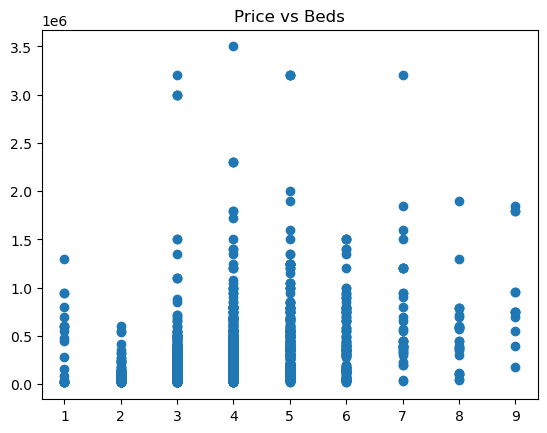

In [12]:
plt.scatter(harare.Beds.values, harare.Price.values)
plt.title('Price vs Beds')

    Harare propertis are largely concertrated between 3 bed and 7 bed properties. The most expensive property has 4 bedrooms, for between 1 to 7 bed properties there is a share of affordable properties under US$100,000.

##### Plotting Price vs Bathrooms

Text(0.5, 1.0, 'Price vs Bathrooms')

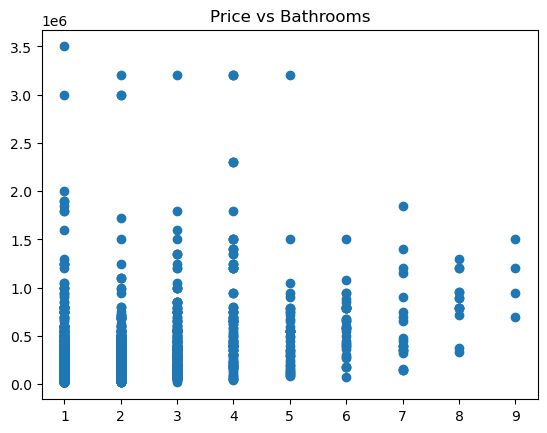

In [14]:
plt.scatter(harare.Baths.values, harare.Price.values)
plt.title('Price vs Bathrooms')

    There is more concertation of properties of less than value of US$200,000 with tless than 7 bathrooms in the Harare housing data.A few properties with 8 and 9 bathrooms selling for less than US$200,000. Above the US$200,000 price mark are just but a few properties between US$300,000 and US$350,000 price range. The most pricey properties all have less than 6 bathrooms. 

    The most expensive property has 1 bathroom lol, this i'm confident that its a typo on data entry on the hosting page.

##### Plotting Price vs Area

Text(0.5, 1.0, 'Price vs Area')

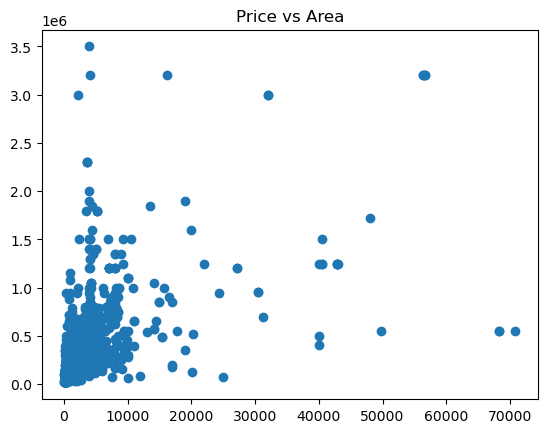

In [15]:
plt.scatter(harare.Area_Sqm.values, harare.Price.values)
plt.title('Price vs Area')

    From the scatter plot above we can observe that the most of the properties are concerntrated within the 0 to 10,000 square meters range and less than US$100,000 price mark. A few outlier points can also be observed in the data however the general position is that as the area increases the price of the property also tends to increase of course under a prescribed threshold.

<br>

### The Multiple Linear Regression Model for the entire housing data

In [16]:
#Importing the necessary libraries, the linear regression model

from sklearn.linear_model import LinearRegression

In [17]:
# initializing the model
reg = LinearRegression()

In [18]:
Y = data['Price'].reset_index(drop = True)
X = data[['Beds', 'Baths', 'Area_Sqm']].reset_index(drop = True)

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.10, random_state = 2)

In [21]:
reg.fit(x_train, y_train)

LinearRegression()

In [22]:
reg.score(x_test, y_test)

0.24077432294204903

    The model predicts 24% of the data correctly, thus the R-square is very low and we cannot adopt this as a useful prediction model.

    I am thinking this is caused by the variation due to location that is towns. In the next section I build a model for Harare properties only.

<br>

### Building a model for the town Harare

In [23]:
Y = harare['Price'].reset_index(drop = True)
X = harare[['Beds', 'Baths', 'Area_Sqm']].reset_index(drop = True)

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.10, random_state = 2)

In [26]:
reg.fit(x_train, y_train)

LinearRegression()

In [27]:
reg.score(x_test, y_test)

0.4291979727359708

    The variability of the Price of the properties in Harare is explained 43% or 4 out of 10 times by the features, the R-squared is low for our acceptance as it needs to be at least 70%.

    Moreso, in Zimbabwe there is a number of constituencies that are contributing to the data. These sections act as different markets as a house with the same features in Harare North or Bulawayo may have different prices. How to resolve this issue in the results? 

    Building a prediction model for each constituency is a good way to seprate the data from diluting the entire dataset for example from low property prices in Harare South or extremely high property prices in Harare North.

In [28]:
data['Constituency'].value_counts().head()

Constituency
harare north           700
harare west            603
harare south           325
harare high density    244
harare east            200
Name: count, dtype: int64

    The data above shows the number of properties contributed to the entire dataset by each constituency. Building a model for each of the above can help with a good predictor since the prediction is restricted to the data in the specified constituency.

<br>

### Building a model for Harare North

In [29]:
harare_n =data[data['Constituency'] == 'harare north']

In [30]:
Y_harare_n = harare_n['Price'].reset_index(drop = True)
X_harare_n = harare_n[['Beds', 'Baths', 'Area_Sqm']].reset_index(drop = True)

In [31]:
x_train, x_test, y_train, y_test = train_test_split(X_harare_n, Y_harare_n, test_size = 0.10, random_state = 2)

In [32]:
reg.fit(x_train, y_train)

LinearRegression()

In [33]:
reg.score(x_test, y_test)

0.4395392920855

    The Harare North prediction model performs better than the initially built model, however it does not perform to my satisfaction thus below 50% accuracy whereas 75% is the least acceptable R-squared in this project.

<br>

#### Introducing the Gradient Boost for Harare North prediciton model

In [34]:
# Gradient descent boosting 

from sklearn import ensemble
clf = ensemble.GradientBoostingRegressor(n_estimators = 100, max_depth = 5, min_samples_split = 2, learning_rate = 0.1, loss = 'squared_error')

In [35]:
clf.fit(x_train, y_train)

GradientBoostingRegressor(max_depth=5)

In [36]:
clf.score(x_test, y_test)

0.7845081712763884

    After introducing the gradient boost to tune the model perfomance the model improved in its prediction accuracy to 78%, thus much of the variability in the Price is explained by the features which is the number of beds, bathrooms and area in square meters.

In [38]:
# Predicting the Price of a property in Harare North

features = [[2,2,400]]
clf.predict(features)

C:\Users\Windows 11\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


array([286907.48649164])

    The Harare North Model predicts that a house with 2 bedsm 2 bathrooms under 400 square meters will cost US$286,907

In [39]:
data.to_csv('housing_ml.csv')